# ***Data Prep***

In [ ]:
import pandas as pd 
import numpy as np 
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.tools import diff
import statsmodels.api as sm 
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install statsmodels
import statsmodels.api as sm
!pip install pmdarima
import pmdarima
!pip install pyramid
import pyramid as pm
!pip install arch yfinance pmdarima
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
import io, os, sys, setuptools, tokenize
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Turmeric.csv', index_col = 'Date', parse_dates=True)

In [2]:
df

,Price
Date,
2021-06-01,170.0
2021-06-02,170.0
2021-06-03,170.0
2021-06-04,170.0
2021-06-05,170.0
...,...
2022-11-26,215.0
2022-11-27,215.0
2022-11-28,215.0


In [3]:
df.dropna()

,Price
Date,
2021-06-01,170.0
2021-06-02,170.0
2021-06-03,170.0
2021-06-04,170.0
2021-06-05,170.0
...,...
2022-11-26,215.0
2022-11-27,215.0
2022-11-28,215.0


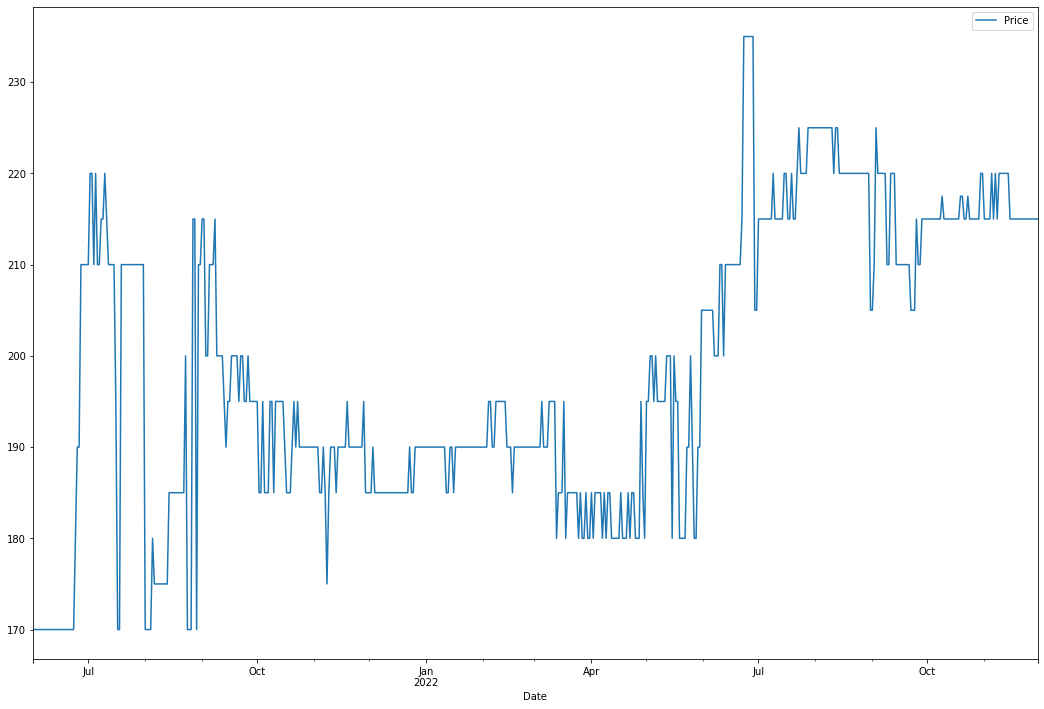

In [ ]:
df.plot(figsize = (18, 12));

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
results = seasonal_decompose(df['Price'], model = 'addtive')

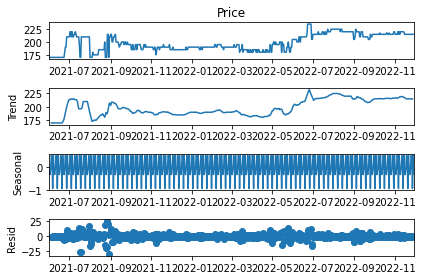

In [6]:
results.plot();

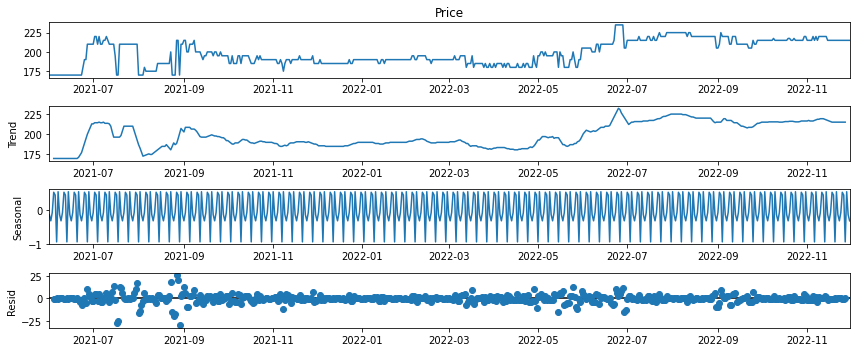

In [7]:
#from pylab import rcParams 
rcParams['figure.figsize'] = 12, 5 

results.plot();

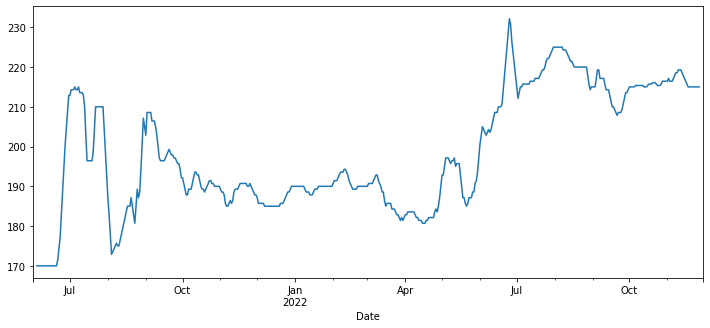

In [8]:
results.trend.plot()

In [9]:
df.index.freq = 'D'

In [ ]:
df.head()

,Price
Date,
2021-06-01,170.0
2021-06-02,170.0
2021-06-03,170.0
2021-06-04,170.0
2021-06-05,170.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 2021-06-01 to 2022-11-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [11]:
train_data = df.iloc[:500]
test_data = df.iloc[499:]

# ***Exponential Smoothing***

In [12]:
fitted_model = ExponentialSmoothing(train_data['Price'], trend = 'add', seasonal = 'add', seasonal_periods=30).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [13]:
test_predictions = fitted_model.forecast(49)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [14]:
test_predictions

2022-10-14    214.443783
2022-10-15    214.446570
2022-10-16    213.506576
2022-10-17    215.382537
2022-10-18    214.445045
2022-10-19    213.815299
2022-10-20    216.312656
2022-10-21    220.690018
2022-10-22    220.691529
2022-10-23    216.941575
2022-10-24    219.115211
2022-10-25    218.528293
2022-10-26    218.528283
2022-10-27    215.290079
2022-10-28    217.348631
2022-10-29    218.527409
2022-10-30    217.346909
2022-10-31    217.938528
2022-11-01    218.233104
2022-11-02    220.296136
2022-11-03    217.356402
2022-11-04    217.353477
2022-11-05    218.236447
2022-11-06    218.824946
2022-11-07    219.413435
2022-11-08    216.319243
2022-11-09    214.700152
2022-11-10    216.168760
2022-11-11    217.052744
2022-11-12    218.524481
2022-11-13    217.312788
2022-11-14    217.315576
2022-11-15    216.375582
2022-11-16    218.251543
2022-11-17    217.314050
2022-11-18    216.684304
2022-11-19    219.181661
2022-11-20    223.559023
2022-11-21    223.560535
2022-11-22    219.810581


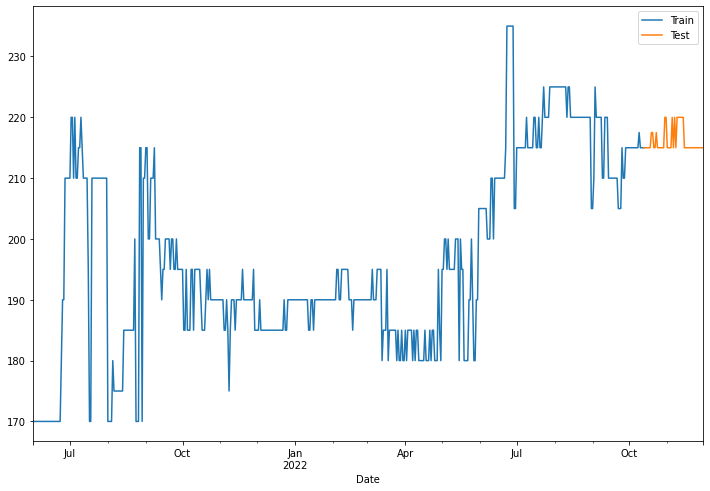

In [ ]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Price'].plot(legend=True, label='Test', figsize=(12,8))

In [ ]:
test_data.describe()

,Price
count,49.000000
mean,216.173469
std,2.047740
min,215.000000
25%,215.000000
50%,215.000000
75%,217.500000
max,220.000000


In [ ]:
mean_absolute_error(test_data,test_predictions)


3.323463990413722

In [ ]:
mean_squared_error(test_data, test_predictions)

15.529554315581544

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
rmse(test_data, test_predictions)

array([2.66448495, 2.66267614, 3.34962421, 2.17560032, 2.66366576,
       3.10944258, 2.03151085, 4.95044158, 4.95182062, 2.16740621,
       3.57232556, 3.1069052 , 3.10689733, 2.21089186, 2.34279078,
       3.10623467, 2.34192761, 2.68758185, 2.88959492, 4.59391403,
       2.34669818, 2.34522521, 2.89197858, 3.33736329, 3.82165446,
       2.03197281, 2.50565887, 2.02674262, 2.20925028, 3.10401656,
       2.32501842, 2.32638572, 2.03678986, 2.90276655, 2.32563719,
       2.09012335, 3.62724174, 7.65859448, 7.66005208, 4.16368121,
       6.15405979, 5.60321871, 5.60320903, 2.83731025, 4.52359956,
       5.60239387, 4.52206036, 5.05788658, 5.32908615])

In [ ]:
np.sqrt(mean_squared_error(test_data, test_predictions))

3.9407555513608736

In [15]:
final_model = ExponentialSmoothing(df['Price'], trend = 'add', seasonal = 'add', seasonal_periods = 60).fit()

In [16]:
forecast_predictions = final_model.forecast(60)

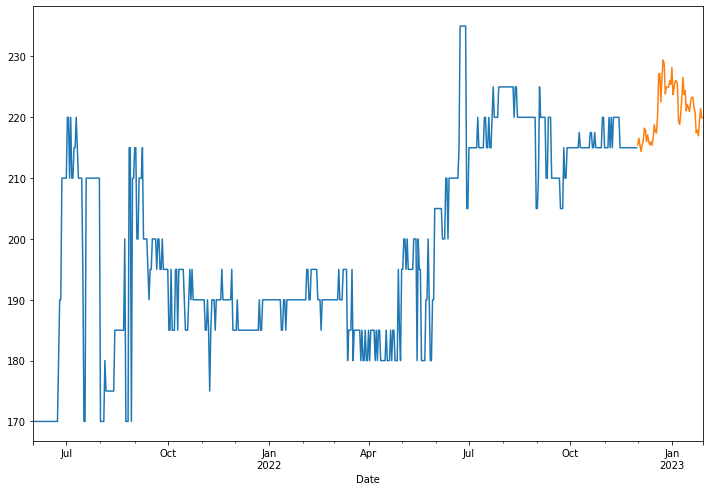

In [ ]:
df['Price'].plot(figsize = (12,8))
forecast_predictions.plot(figsize=(12,8))

In [17]:
forecast_predictions

2022-12-01    215.463434
2022-12-02    216.585663
2022-12-03    215.472359
2022-12-04    214.371147
2022-12-05    215.475639
2022-12-06    216.006731
2022-12-07    218.217314
2022-12-08    217.926803
2022-12-09    215.984133
2022-12-10    217.108068
2022-12-11    216.016059
2022-12-12    215.447354
2022-12-13    215.976559
2022-12-14    215.425394
2022-12-15    216.559728
2022-12-16    218.799248
2022-12-17    217.699571
2022-12-18    217.406214
2022-12-19    220.178896
2022-12-20    227.157540
2022-12-21    227.214944
2022-12-22    222.533607
2022-12-23    226.691797
2022-12-24    229.418972
2022-12-25    228.849176
2022-12-26    223.851315
2022-12-27    224.975332
2022-12-28    224.983888
2022-12-29    224.950582
2022-12-30    225.992267
2022-12-31    225.416145
2023-01-01    228.180659
2023-01-02    223.734553
2023-01-03    224.869057
2023-01-04    225.997897
2023-01-05    226.011032
2023-01-06    225.474669
2023-01-07    219.383621
2023-01-08    218.832295
2023-01-09    220.490439


# *SARIMAX*

In [ ]:
from datetime import datetime

In [ ]:
df_KN = pd.read_csv('Turmeric.csv', index_col = 'Date', parse_dates = True)

In [ ]:
df_KN.index.freq ='D'

In [ ]:
df_KN.index

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=548, freq='D')

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df_KN['Price'])

ADF Statistics: -2.8151077359531347
p- value: 0.05614793081360921
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
## Use Techniques Differencing
df_KN['Price First Difference']=df_KN['Price']-df_KN['Price'].shift(1)

In [ ]:
df_KN.head()

,Price,Price First Difference
Date,,
2021-06-01,170.0,NaN
2021-06-02,170.0,0.0
2021-06-03,170.0,0.0
2021-06-04,170.0,0.0
2021-06-05,170.0,0.0


In [ ]:
adf_test(df_KN['Price'].dropna())

ADF Statistics: -2.8151077359531347
p- value: 0.05614793081360921
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df_KN['Price Second Difference']=df_KN['Price First Difference']-df_KN['Price First Difference'].shift(1)

In [ ]:
adf_test(df_KN['Price Second Difference'].dropna())

ADF Statistics: -10.840083599493656
p- value: 1.624315159320688e-19
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
### 1 months
## Use Techniques Differencing
df_KN['Price Monthly Difference']=df_KN['Price']-df_KN['Price'].shift(30)

In [ ]:
adf_test(df_KN['Price Monthly Difference'].dropna())

ADF Statistics: -4.903426826290217
p- value: 3.434266691529256e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


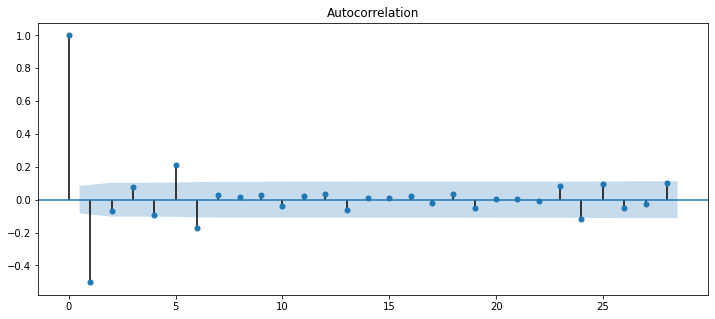

In [ ]:
acf = plot_acf(df_KN['Price Second Difference'].dropna())

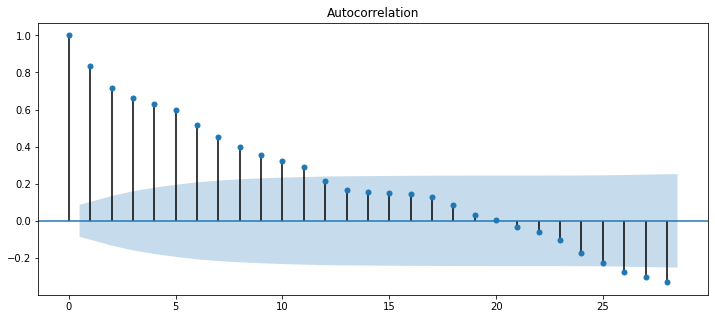

In [ ]:
acf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

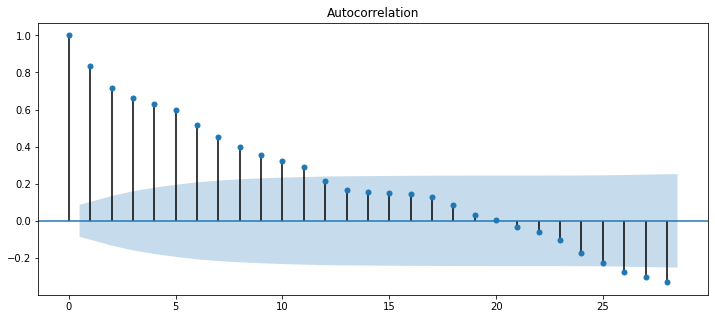

In [ ]:
pacf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

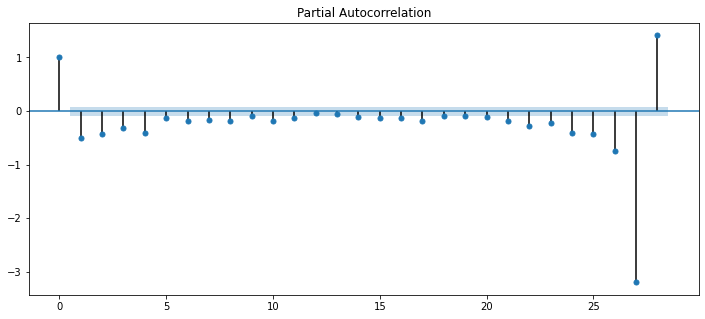

In [ ]:
result_KN = plot_pacf(df_KN["Price Second Difference"].dropna())

In [ ]:

from datetime import datetime,timedelta
train_dataset_end=datetime(2022,10,1)
test_dataset_end=datetime(2022,11,30)

In [ ]:
train_data=df_KN[:train_dataset_end]
test_data=df_KN[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2022-10-02,215.0,0.0,0.0,5.0
2022-10-03,215.0,0.0,0.0,-10.0
2022-10-04,215.0,0.0,0.0,-5.0
2022-10-05,215.0,0.0,0.0,-5.0
2022-10-06,215.0,0.0,0.0,-5.0
2022-10-07,215.0,0.0,0.0,-5.0
2022-10-08,215.0,0.0,0.0,-5.0
2022-10-09,217.5,2.5,2.5,7.5
2022-10-10,215.0,-2.5,-5.0,5.0


In [ ]:
import statsmodels.api as sm

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima import ARIMA

In [ ]:
train_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2021-06-01,170.0,NaN,NaN,NaN
2021-06-02,170.0,0.0,NaN,NaN
2021-06-03,170.0,0.0,0.0,NaN
2021-06-04,170.0,0.0,0.0,NaN
2021-06-05,170.0,0.0,0.0,NaN
...,...,...,...,...
2022-09-27,210.0,0.0,5.0,-10.0
2022-09-28,215.0,5.0,5.0,-5.0
2022-09-29,215.0,0.0,-5.0,-5.0


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_SARIMAX=SARIMAX(train_data['Price'],order=(3,0,5),seasonal_order=(0,1,0,30))

In [ ]:
model_SARIMAX_fit=model_SARIMAX.fit()

In [ ]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                  488
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 30)   Log Likelihood               -1644.628
Date:                             Fri, 06 Jan 2023   AIC                           3307.256
Time:                                     23:38:03   BIC                           3344.398
Sample:                                 06-01-2021   HQIC                          3321.884
                                      - 10-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4181      0.159      2.626      0.009       0.106       0.730
ar.L2          0.1306      0.147      0.888      0.374      -0.158       0.419
ar.L3          0.3012      0.173      1.745      0.081      -0.037       0.640
ma.L1          0.3633      0.163      2.228      0.026       0.044       0.683
ma.L2          0.0457      0.171      0.267      0.789      -0.290       0.381
ma.L3         -0.1217      0.073     -1.678      0.093      -0.264       0.020
ma.L4         -0.0573      0.066     -0.871      0.384      -0.186       0.072
ma.L5          0.2120      0.042      5.091      0.000       0.130       0.294
sigma2        76.7375      3.256     23.566      0.000      70.355      83.120
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               598.32
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-10-02 00:00:00
2022-11-30 00:00:00


In [ ]:
pred_Sarimax=model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))
residuals=test_data['Price']-pred_Sarimax

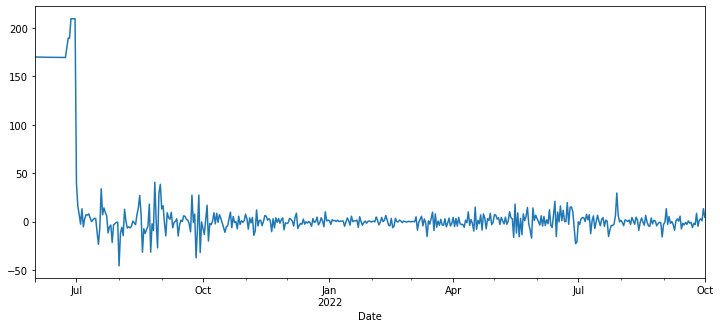

In [ ]:
model_SARIMAX_fit.resid.plot()

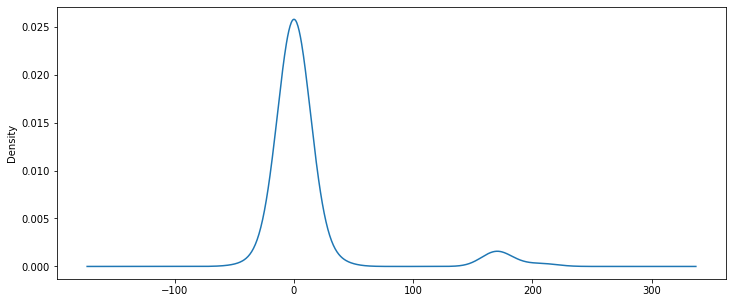

In [ ]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_SARIMAX']=pred_Sarimax

In [ ]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference,Predicted_SARIMAX
Date,,,,,
2022-10-02,215.0,0.0,0.0,5.0,216.289060
2022-10-03,215.0,0.0,0.0,-10.0,231.083790
2022-10-04,215.0,0.0,0.0,-5.0,225.242312
2022-10-05,215.0,0.0,0.0,-5.0,227.464547
2022-10-06,215.0,0.0,0.0,-5.0,226.597253
2022-10-07,215.0,0.0,0.0,-5.0,225.312457
2022-10-08,215.0,0.0,0.0,-5.0,225.331312
2022-10-09,217.5,2.5,2.5,7.5,214.910113
2022-10-10,215.0,-2.5,-5.0,5.0,214.349501


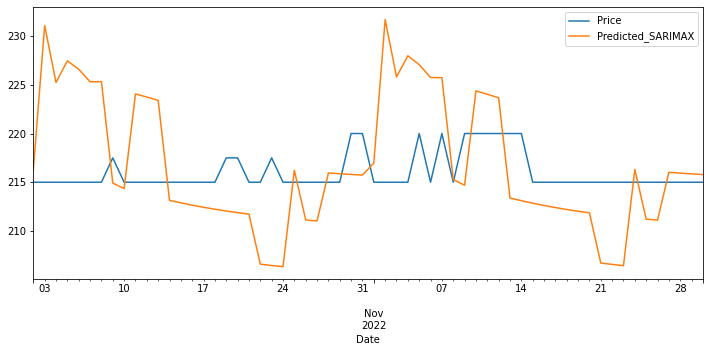

In [ ]:
test_data[['Price','Predicted_SARIMAX']].plot()

In [ ]:
pred_Sarimax

2022-10-02    216.289060
2022-10-03    231.083790
2022-10-04    225.242312
2022-10-05    227.464547
2022-10-06    226.597253
2022-10-07    225.312457
2022-10-08    225.331312
2022-10-09    214.910113
2022-10-10    214.349501
2022-10-11    224.065763
2022-10-12    223.747028
2022-10-13    223.407843
2022-10-14    213.138929
2022-10-15    212.886183
2022-10-16    212.643217
2022-10-17    212.427618
2022-10-18    212.229608
2022-10-19    212.045474
2022-10-20    211.877681
2022-10-21    211.723832
2022-10-22    206.582126
2022-10-23    206.452241
2022-10-24    206.333085
2022-10-25    216.223616
2022-10-26    211.123160
2022-10-27    211.030968
2022-10-28    215.946328
2022-10-29    215.868638
2022-10-30    215.797331
2022-10-31    215.731875
2022-11-01    216.960852
2022-11-02    231.700432
2022-11-03    225.808332
2022-11-04    227.984100
2022-11-05    227.074154
2022-11-06    225.750208
2022-11-07    225.733127
2022-11-08    215.278941
2022-11-09    214.688050
2022-11-10    224.376520


In [ ]:
predicted_value_SARIMA = pred_Sarimax

In [ ]:
predicted_value_SARIMA = model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))

In [ ]:
mean_absolute_error(test_data['Price'], test_data['Predicted_SARIMAX'])

5.44082412403234

In [ ]:
mean_squared_error(test_data['Price'], test_data['Predicted_SARIMAX'])

46.15254526213669

In [ ]:
rmse(test_data['Predicted_SARIMAX'], test_data['Price'])

6.793566461155487

# ***FB Prophet***

In [ ]:
df_fb  = pd.read_csv('Turmeric.csv')

In [ ]:
df_fb.columns = ['ds', 'y']

In [ ]:
df_fb['ds'] =pd.to_datetime(df_fb['ds'])

In [ ]:
df_fb.head()

,ds,y
0,2021-06-01,170.0
1,2021-06-02,170.0
2,2021-06-03,170.0
3,2021-06-04,170.0
4,2021-06-05,170.0


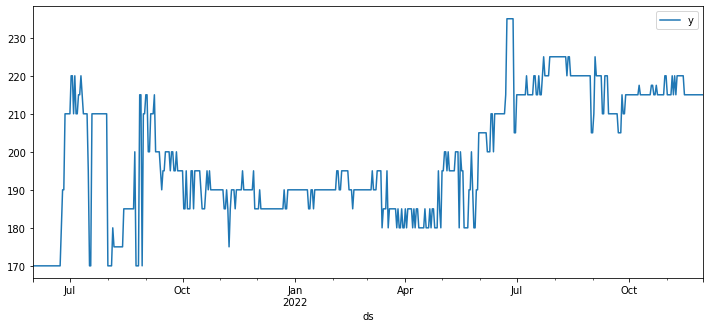

In [ ]:
df_fb.plot(x='ds', y='y')

In [ ]:
len(df_fb)

548

In [ ]:
train_fb = df_fb.iloc[:488]
test_fb = df_fb.iloc[488:]

In [ ]:
import prophet

In [ ]:
import io, os, sys, setuptools, tokenize

In [ ]:
from fbprophet import Prophet

In [ ]:
m = Prophet()
m.fit(train_fb)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
543,2022-11-26,223.594188,210.572363,237.353682,219.829462,227.176139,0.445490,0.445490,0.445490,0.445490,0.445490,0.445490,0.0,0.0,0.0,224.039678
544,2022-11-27,223.664843,209.108310,236.383427,219.778525,227.363455,-1.084193,-1.084193,-1.084193,-1.084193,-1.084193,-1.084193,0.0,0.0,0.0,222.580649
545,2022-11-28,223.735497,210.908614,237.239063,219.705994,227.538042,0.574209,0.574209,0.574209,0.574209,0.574209,0.574209,0.0,0.0,0.0,224.309706
546,2022-11-29,223.806151,210.425204,235.985483,219.582033,227.700456,-0.070761,-0.070761,-0.070761,-0.070761,-0.070761,-0.070761,0.0,0.0,0.0,223.735390
547,2022-11-30,223.876806,210.020697,236.430924,219.570527,227.860797,-0.369991,-0.369991,-0.369991,-0.369991,-0.369991,-0.369991,0.0,0.0,0.0,223.506815


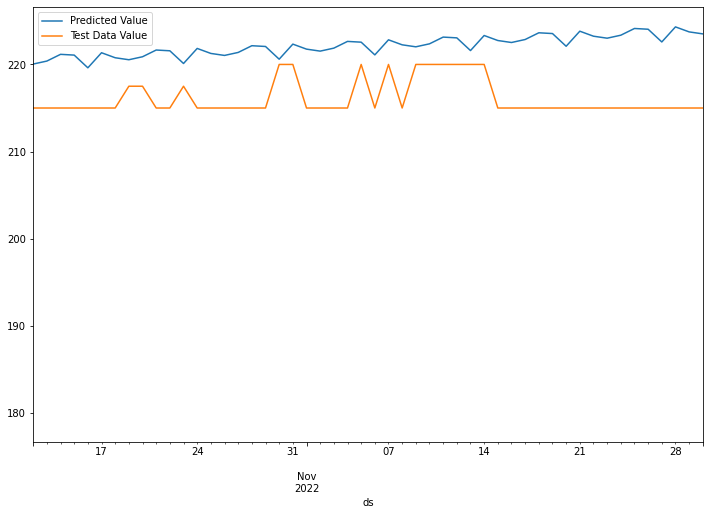

In [ ]:
ax = forecast.plot(x='ds', y = 'yhat', label = 'Predicted Value', legend = True, figsize = (12, 8))
test_fb.plot(x='ds', y = 'y', label = 'Test Data Value', legend = True, ax = ax, xlim=('2022-10-12','2022-11-30'))

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions_fb = forecast.iloc[-60:]['yhat']

In [ ]:
predictions_fb

488    218.624002
489    220.353059
490    219.778743
491    219.550168
492    219.893037
493    220.664490
494    220.577612
495    219.118583
496    220.847640
497    220.273324
498    220.044749
499    220.387618
500    221.159071
501    221.072193
502    219.613164
503    221.342221
504    220.767905
505    220.539330
506    220.882199
507    221.653652
508    221.566774
509    220.107745
510    221.836802
511    221.262486
512    221.033911
513    221.376780
514    222.148233
515    222.061354
516    220.602326
517    222.331382
518    221.757066
519    221.528492
520    221.871361
521    222.642814
522    222.555935
523    221.096907
524    222.825963
525    222.251647
526    222.023072
527    222.365942
528    223.137395
529    223.050516
530    221.591488
531    223.320544
532    222.746228
533    222.517653
534    222.860523
535    223.631976
536    223.545097
537    222.086069
538    223.815125
539    223.240809
540    223.012234
541    223.355104
542    224.126556
543    224

In [ ]:
test_fb

,ds,y
488,2022-10-02,215.0
489,2022-10-03,215.0
490,2022-10-04,215.0
491,2022-10-05,215.0
492,2022-10-06,215.0
493,2022-10-07,215.0
494,2022-10-08,215.0
495,2022-10-09,217.5
496,2022-10-10,215.0
497,2022-10-11,215.0


In [ ]:
mean_absolute_error(test_fb['y'], predictions_fb)

5.776655092010583

In [ ]:
mean_squared_error(test_fb['y'], predictions_fb)

38.33131155545361

In [ ]:
rmse(predictions_fb, test_fb['y'])

6.191228598222941

In [ ]:
test_fb.mean()

y    216.0
dtype: float64

In [ ]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [ ]:
#Intial Training period 
initial = 400
initial = str(initial) +' days'
initial 
#Period Length for we are going to run cross validation for 
period = 400
period = str(period) +' days'

#Horizon of prediction for each fold 
horizon = 60
horizon = str(horizon) + ' days'

In [ ]:
dfb_cv = cross_validation(m, initial = initial, period=period, horizon = horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-08-02 00:00:00 and 2022-08-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dfb_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-03,225.170469,213.203762,237.180788,225.0,2022-08-02
1,2022-08-04,226.000584,213.661429,238.522877,225.0,2022-08-02
2,2022-08-05,227.158310,214.515309,239.836080,225.0,2022-08-02
3,2022-08-06,227.086479,214.235557,240.243698,225.0,2022-08-02
4,2022-08-07,225.457289,213.142194,238.821150,225.0,2022-08-02


In [ ]:
performance_metrics(dfb_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,2.976897,1.725369,1.438636,0.006394,0.006860,1.000000
1,7 days,3.991617,1.997903,1.822447,0.008100,0.009433,1.000000
2,8 days,5.139838,2.267121,2.123850,0.009439,0.010293,1.000000
3,9 days,16.802512,4.099087,3.203984,0.014385,0.011627,1.000000
4,10 days,19.911897,4.462275,3.655712,0.016393,0.012373,1.000000
5,11 days,23.598002,4.857777,4.366999,0.019554,0.016742,1.000000
6,12 days,33.253333,5.766570,5.256522,0.023644,0.021160,1.000000
7,13 days,50.250792,7.088779,6.577169,0.029689,0.029059,1.000000
8,14 days,65.977353,8.122644,7.794313,0.035268,0.038034,1.000000
9,15 days,71.730127,8.469364,8.095716,0.036638,0.041381,1.000000


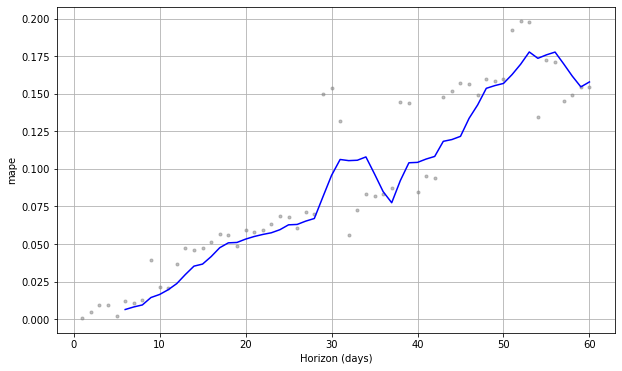

In [ ]:
plot_cross_validation_metric(dfb_cv, metric = 'mape');

# **TREND FB**

In [ ]:
df_t = pd.read_csv('Turmeric.csv')

In [ ]:
df_t.columns = ['ds', 'y']

In [ ]:
df_t['ds'] = pd.to_datetime(df_t['ds'])

In [ ]:
t = Prophet(yearly_seasonality=True, daily_seasonality=True)

In [ ]:
t.fit(df_t)

In [ ]:
future_t = t.make_future_dataframe(periods=12)
forecast_t = t.predict(future)

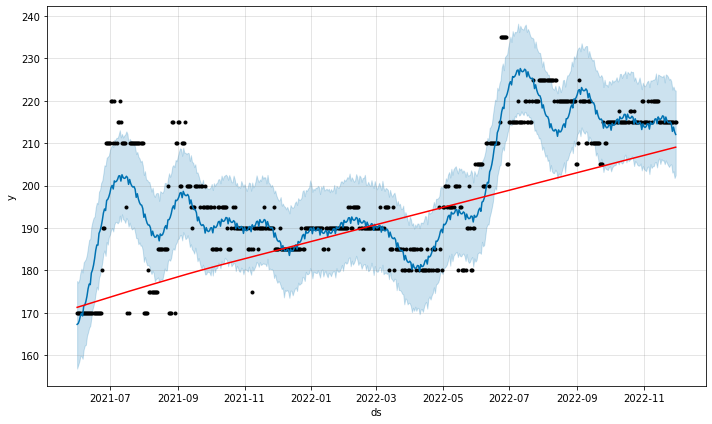

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = t.plot(forecast_t)
a = add_changepoints_to_plot(fig.gca(), t, forecast_t)

In [ ]:
df_S = pd.read_csv('Turmeric.csv')

In [ ]:
df_S.columns = ['ds', 'y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


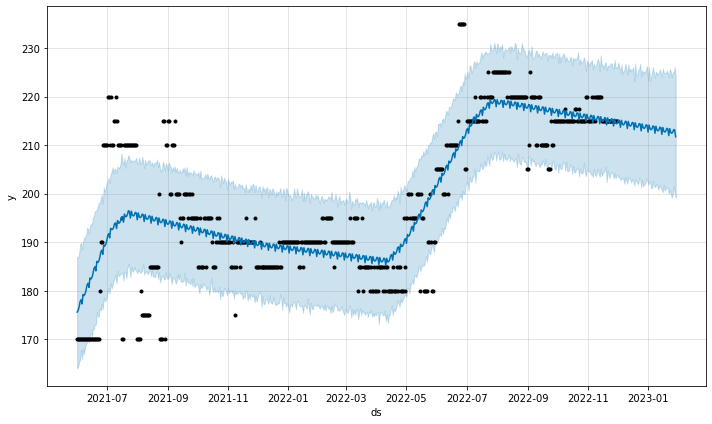

In [ ]:
S = Prophet()
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

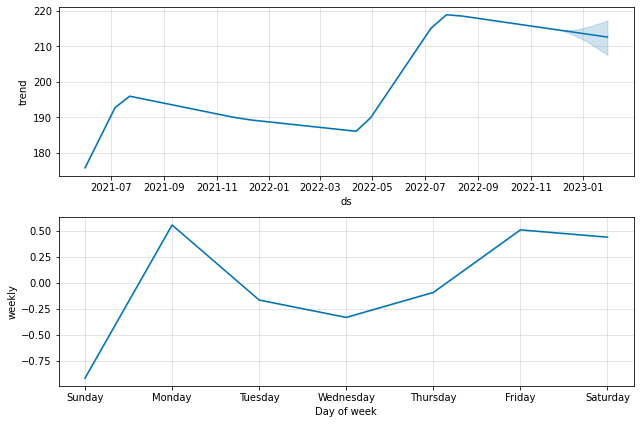

In [ ]:
figure = S.plot_components(forecast);

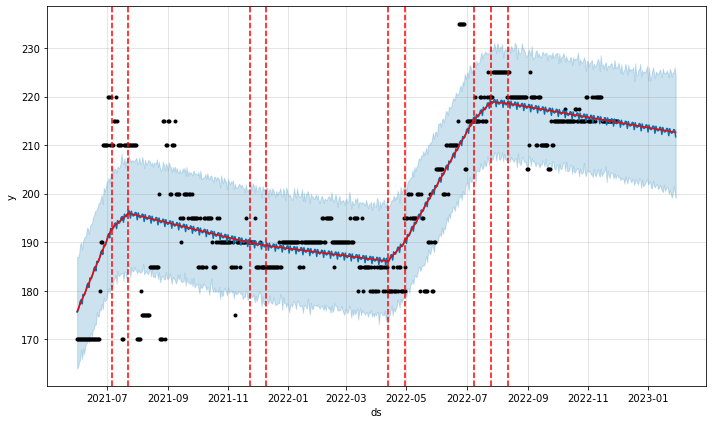

In [ ]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


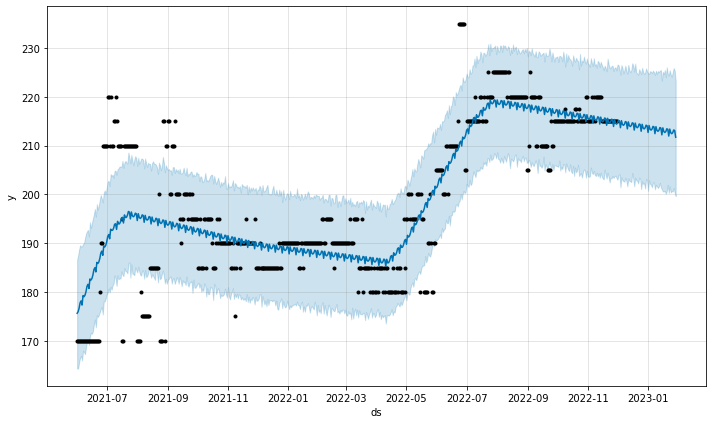

In [ ]:
S = Prophet(seasonality_mode='additive')
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

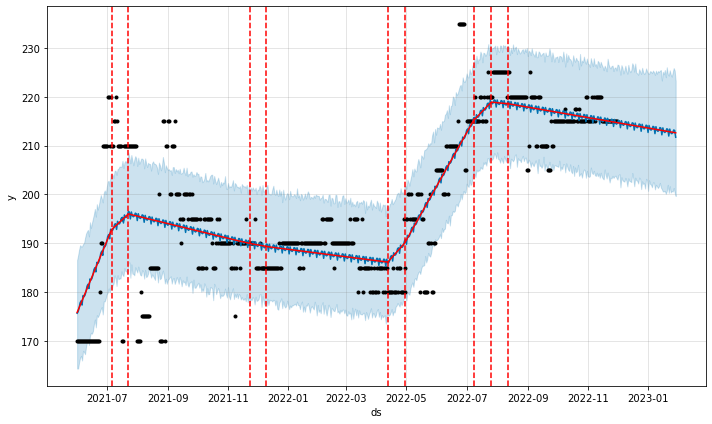

In [ ]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

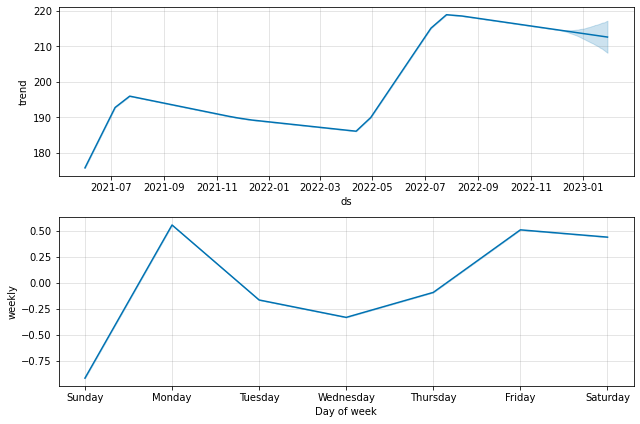

In [ ]:
figure = S.plot_components(forecast)

# ***LSTM***

In [ ]:
df_LSTM=pd.read_csv("Turmeric.csv",parse_dates=["Date"],index_col=[0])

In [ ]:
print(df_LSTM.index.freq)

None


In [ ]:
test_split=round(len(df_LSTM)*0.20)

In [ ]:
df_for_training=df[:-110]
df_for_testing=df[-110:]

In [ ]:
print(df_for_training.shape)
print(df_for_testing.shape)

(438, 1)
(110, 1)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [ ]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [ ]:
df_for_training_scaled

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.15384615],
       [0.30769231],
       [0.30769231],
       [0.61538462],
       [0.61538462],
       [0.61538462],
       [0.61538462],
       [0.61538462],
       [0.76923077],
       [0.76923077],
       [0.61538462],
       [0.76923077],
       [0.61538462],
       [0.61538462],
       [0.69230769],
       [0.69230769],
       [0.76923077],
       [0.69230769],
       [0.61538462],
       [0.61538462],
       [0.61538462],
       [0.61538462],
       [0.38461538],
       [0.        ],
       [0.   

In [ ]:
df_for_training_scaled.shape

(438, 1)

In [ ]:
df_for_testing_scaled.shape

(110, 1)

In [ ]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [ ]:
trainX.shape

(408, 30, 1)

In [ ]:
testX,testY=createXY(df_for_testing_scaled,30)

In [ ]:
trainX[0]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.15384615],
       [0.30769231],
       [0.30769231],
       [0.61538462],
       [0.61538462],
       [0.61538462],
       [0.61538462]])

In [ ]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (408, 30, 1)
trainY Shape--  (408,)


In [ ]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (80, 30, 1)
testY Shape--  (80,)


In [ ]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.15384615]
 [0.30769231]
 [0.30769231]
 [0.61538462]
 [0.61538462]
 [0.61538462]
 [0.61538462]]

trainY[0]--  0.6153846153846154


In [ ]:
trainY[0]

0.6153846153846154

In [ ]:
trainY.shape

(408,)

In [ ]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model
#Grid Search
grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,24,32],
              'epochs' : [32,64],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

In [ ]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/32
13/13 [==============================] - 5s 100ms/step - loss: 0.0823 - val_loss: 0.0068
Epoch 2/32
13/13 [==============================] - 0s 22ms/step - loss: 0.0194 - val_loss: 0.0044
Epoch 3/32
13/13 [==============================] - 0s 24ms/step - loss: 0.0140 - val_loss: 0.0025
Epoch 4/32
13/13 [==============================] - 0s 23ms/step - loss: 0.0154 - val_loss: 0.0048
Epoch 5/32
13/13 [==============================] - 0s 27ms/step - loss: 0.0154 - val_loss: 0.0087
Epoch 6/32
13/13 [==============================] - 0s 27ms/step - loss: 0.0141 - val_loss: 0.0027
Epoch 7/32
13/13 [==============================] - 0s 30ms/step - loss: 0.0142 - val_loss: 0.0030
Epoch 8/32
13/13 [==============================] - 0s 22ms/step - loss: 0.0129 - val_loss: 0.0055
Epoch 9/32
13/13 [==============================] - 0s 24ms/step - loss: 0.0144 - val_loss: 0.0046
Epoch 10/32
13/13 [==============================] - 0s 22ms/step - loss: 0.0130 - val_loss: 0.0024
Epoch 11

In [ ]:
grid_search.best_params_

{'batch_size': 16, 'epochs': 64, 'optimizer': 'adam'}

In [ ]:
my_model=grid_search.best_estimator_.model

In [ ]:
my_model

In [ ]:
prediction=my_model.predict(testX)

3/3 [==============================] - 1s 9ms/step


In [ ]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.76663387]
 [0.76244396]
 [0.77311075]
 [0.645516  ]
 [0.6516172 ]
 [0.63943946]
 [0.6375959 ]
 [0.6351933 ]
 [0.6337892 ]
 [0.63254195]
 [0.6314536 ]
 [0.57368666]
 [0.5686465 ]
 [0.5619588 ]
 [0.6715911 ]
 [0.62383515]
 [0.6279511 ]
 [0.68340194]
 [0.68765205]
 [0.692382  ]
 [0.6935301 ]
 [0.6942786 ]
 [0.6947807 ]
 [0.6952928 ]
 [0.6958534 ]
 [0.6964684 ]
 [0.69711596]
 [0.69776815]
 [0.72988623]
 [0.6988515 ]
 [0.7025096 ]
 [0.7005571 ]
 [0.70101345]
 [0.70112085]
 [0.7013742 ]
 [0.7015699 ]
 [0.701734  ]
 [0.70185304]
 [0.7336248 ]
 [0.73335207]
 [0.70449454]
 [0.70560896]
 [0.73498356]
 [0.7023772 ]
 [0.70579183]
 [0.70314956]
 [0.7032048 ]
 [0.7029254 ]
 [0.70286626]
 [0.7669763 ]
 [0.7657278 ]
 [0.7067778 ]
 [0.7098562 ]
 [0.70471317]
 [0.70447135]
 [0.76835173]
 [0.7018927 ]
 [0.7749282 ]
 [0.70216674]
 [0.77631605]
 [0.7673154 ]
 [0.7741937 ]
 [0.77406967]
 [0.77517194]
 [0.7756429 ]
 [0.7099669 ]
 [0.7149699 ]
 [0.7086679 ]
 [0.7085101 ]
 [0.70757574]
 [0.7071

In [ ]:
scaler.inverse_transform(prediction)

array([[219.8312 ],
       [219.55885],
       [220.2522 ],
       [211.95853],
       [212.35512],
       [211.56357],
       [211.44373],
       [211.28757],
       [211.1963 ],
       [211.11522],
       [211.04448],
       [207.28963],
       [206.96202],
       [206.52731],
       [213.65341],
       [210.54929],
       [210.81682],
       [214.42113],
       [214.69739],
       [215.00484],
       [215.07945],
       [215.12811],
       [215.16075],
       [215.19403],
       [215.23047],
       [215.27045],
       [215.31253],
       [215.35493],
       [217.44261],
       [215.42535],
       [215.66313],
       [215.53622],
       [215.56587],
       [215.57285],
       [215.58932],
       [215.60205],
       [215.61272],
       [215.62044],
       [217.68562],
       [217.6679 ],
       [215.79214],
       [215.8646 ],
       [217.77394],
       [215.65453],
       [215.87648],
       [215.70471],
       [215.70831],
       [215.69016],
       [215.68631],
       [219.85345],


In [ ]:
prediction_copies_array = np.repeat(prediction,1, axis=-1)

In [ ]:
prediction_copies_array.shape

(80, 1)

In [ ]:
prediction_copies_array

array([[0.76663387],
       [0.76244396],
       [0.77311075],
       [0.645516  ],
       [0.6516172 ],
       [0.63943946],
       [0.6375959 ],
       [0.6351933 ],
       [0.6337892 ],
       [0.63254195],
       [0.6314536 ],
       [0.57368666],
       [0.5686465 ],
       [0.5619588 ],
       [0.6715911 ],
       [0.62383515],
       [0.6279511 ],
       [0.68340194],
       [0.68765205],
       [0.692382  ],
       [0.6935301 ],
       [0.6942786 ],
       [0.6947807 ],
       [0.6952928 ],
       [0.6958534 ],
       [0.6964684 ],
       [0.69711596],
       [0.69776815],
       [0.72988623],
       [0.6988515 ],
       [0.7025096 ],
       [0.7005571 ],
       [0.70101345],
       [0.70112085],
       [0.7013742 ],
       [0.7015699 ],
       [0.701734  ],
       [0.70185304],
       [0.7336248 ],
       [0.73335207],
       [0.70449454],
       [0.70560896],
       [0.73498356],
       [0.7023772 ],
       [0.70579183],
       [0.70314956],
       [0.7032048 ],
       [0.702

In [ ]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),1)))[:,0]

In [ ]:
pred

array([219.8312 , 219.55885, 220.2522 , 211.95853, 212.35512, 211.56357,
       211.44373, 211.28757, 211.1963 , 211.11522, 211.04448, 207.28963,
       206.96202, 206.52731, 213.65341, 210.54929, 210.81682, 214.42113,
       214.69739, 215.00484, 215.07945, 215.12811, 215.16075, 215.19403,
       215.23047, 215.27045, 215.31253, 215.35493, 217.44261, 215.42535,
       215.66313, 215.53622, 215.56587, 215.57285, 215.58932, 215.60205,
       215.61272, 215.62044, 217.68562, 217.6679 , 215.79214, 215.8646 ,
       217.77394, 215.65453, 215.87648, 215.70471, 215.70831, 215.69016,
       215.68631, 219.85345, 219.77231, 215.94055, 216.14066, 215.80635,
       215.79063, 219.94287, 215.62302, 220.37035, 215.64084, 220.46054,
       219.8755 , 220.32259, 220.31453, 220.38618, 220.41678, 216.14784,
       216.47304, 216.06342, 216.05316, 215.99243, 215.96742, 215.93842,
       215.91055, 215.8805 , 215.84944, 215.81819, 215.78783, 215.75928,
       215.73323, 215.71031], dtype=float32)

In [ ]:
original_copies_array = np.repeat(testY,1, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),1)))[:,0]

In [ ]:
pred

array([219.8312 , 219.55885, 220.2522 , 211.95853, 212.35512, 211.56357,
       211.44373, 211.28757, 211.1963 , 211.11522, 211.04448, 207.28963,
       206.96202, 206.52731, 213.65341, 210.54929, 210.81682, 214.42113,
       214.69739, 215.00484, 215.07945, 215.12811, 215.16075, 215.19403,
       215.23047, 215.27045, 215.31253, 215.35493, 217.44261, 215.42535,
       215.66313, 215.53622, 215.56587, 215.57285, 215.58932, 215.60205,
       215.61272, 215.62044, 217.68562, 217.6679 , 215.79214, 215.8646 ,
       217.77394, 215.65453, 215.87648, 215.70471, 215.70831, 215.69016,
       215.68631, 219.85345, 219.77231, 215.94055, 216.14066, 215.80635,
       215.79063, 219.94287, 215.62302, 220.37035, 215.64084, 220.46054,
       219.8755 , 220.32259, 220.31453, 220.38618, 220.41678, 216.14784,
       216.47304, 216.06342, 216.05316, 215.99243, 215.96742, 215.93842,
       215.91055, 215.8805 , 215.84944, 215.81819, 215.78783, 215.75928,
       215.73323, 215.71031], dtype=float32)

In [ ]:
print("Predicted Values-- " ,pred)
print("\nOriginal Values-- ",original)

Predicted Values--  [219.8312  219.55885 220.2522  211.95853 212.35512 211.56357 211.44373
 211.28757 211.1963  211.11522 211.04448 207.28963 206.96202 206.52731
 213.65341 210.54929 210.81682 214.42113 214.69739 215.00484 215.07945
 215.12811 215.16075 215.19403 215.23047 215.27045 215.31253 215.35493
 217.44261 215.42535 215.66313 215.53622 215.56587 215.57285 215.58932
 215.60205 215.61272 215.62044 217.68562 217.6679  215.79214 215.8646
 217.77394 215.65453 215.87648 215.70471 215.70831 215.69016 215.68631
 219.85345 219.77231 215.94055 216.14066 215.80635 215.79063 219.94287
 215.62302 220.37035 215.64084 220.46054 219.8755  220.32259 220.31453
 220.38618 220.41678 216.14784 216.47304 216.06342 216.05316 215.99243
 215.96742 215.93842 215.91055 215.8805  215.84944 215.81819 215.78783
 215.75928 215.73323 215.71031]

Original Values--  [220.  220.  210.  210.  210.  210.  210.  210.  210.  210.  205.  205.
 205.  215.  210.  210.  215.  215.  215.  215.  215.  215.  215.  215.
 215

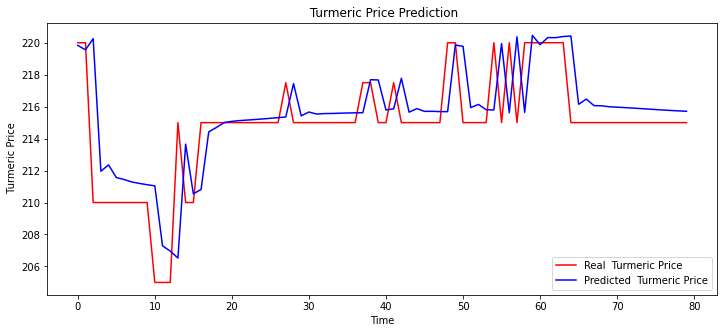

In [ ]:
plt.plot(original, color = 'red', label = 'Real  Turmeric Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Turmeric Price')
plt.title(' Turmeric Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Turmeric Price')
plt.legend()
plt.show()

In [ ]:
mean_absolute_error(original, pred)

1.6301490783691421

In [ ]:
mean_squared_error(original, pred)

6.343910784268532

In [ ]:
rmse(pred, original)

2.518712128106055